In [37]:
# from clustering import DBSCAN
from data import get_data, exclude_columns
from clustering.ward import dbscan_optimized, diagnose_dbscan_data
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
(
    df,
    X_scaled,
) = get_data()
len(X_scaled)

feature_columns = [col for col in df.columns if col not in exclude_columns]
feature_df = df[feature_columns].copy()

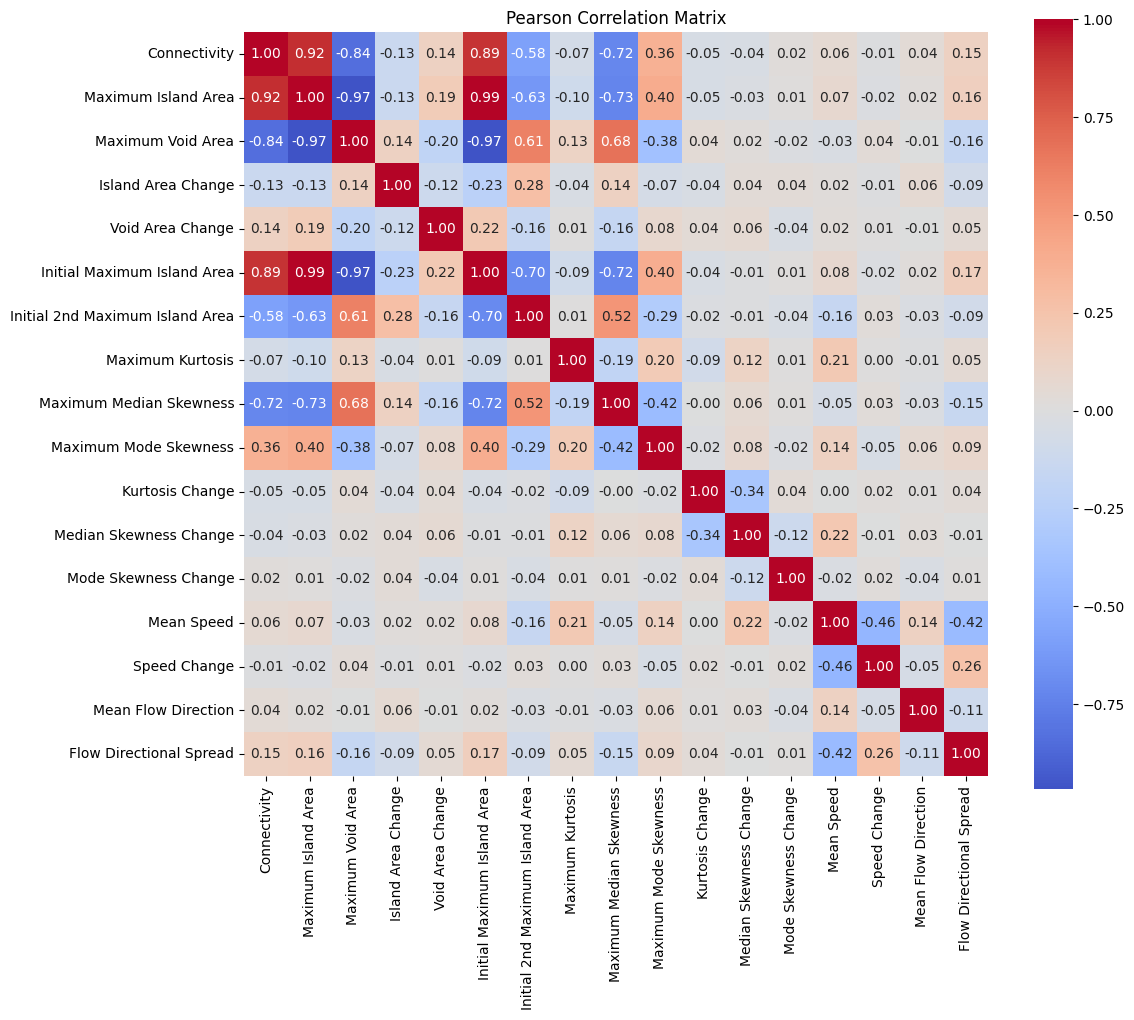

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
correlation_matrix = feature_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f"
)
plt.title("Pearson Correlation Matrix")
plt.show()

=== Data Diagnostics ===
Data shape: (880, 17)
Data range: min=-14.473, max=10.596
Data mean: 0.000, std: 1.000
Near-constant features: 0
Distance statistics:
  Min distance: 0.180688
  25th percentile: 3.889532
  Median distance: 5.279938
  75th percentile: 6.618934
  Max distance: 23.513951
Suggested eps range: 1.315671 to 2.650863

=== Quick Parameter Tests ===
eps=1.315671, min_samples=2: 55 clusters, 317 noise
eps=2.650863, min_samples=2: 12 clusters, 77 noise
eps=5.279938, min_samples=3: 2 clusters, 6 noise
eps=2.103621, min_samples=2: 20 clusters, 131 noise
Loading data...
Data shape: (880, 17)

=== Finding optimal eps ===


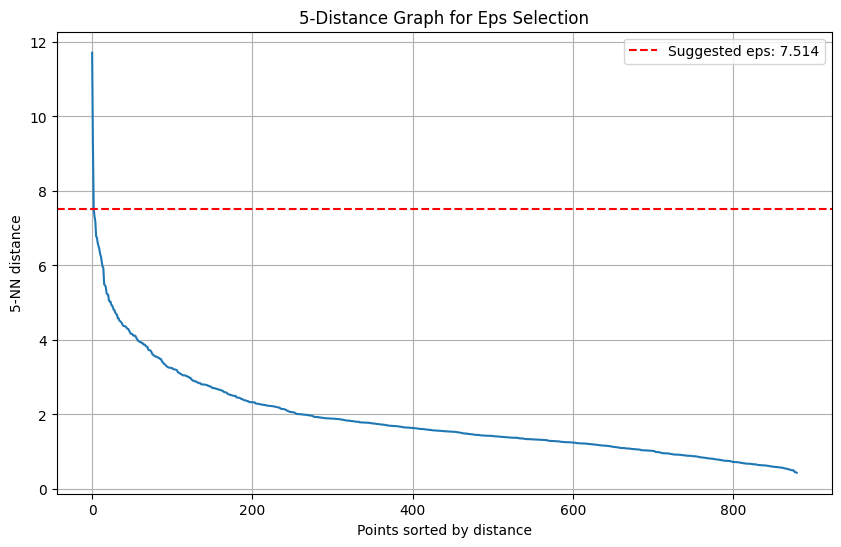

Suggested eps: 7.514

=== Optimizing parameters ===
Eps range: [ 0.75136883  2.73225028  4.71313174  6.69401319  8.67489465 10.6557761
 12.63665756 14.61753902 16.59842047 18.57930193 20.56018338 22.54106484]
Min samples range: [2, 3, 4, 5, 6, 7, 8, 9]
Testing 50 parameter combinations...
Progress: 0/50 (Valid results so far: 0)
Progress: 10/50 (Valid results so far: 10)
Progress: 20/50 (Valid results so far: 20)
Progress: 30/50 (Valid results so far: 30)
Progress: 40/50 (Valid results so far: 40)
Found 50 valid parameter combinations out of 50
Best parameters: {'eps': np.float64(16.598420471051945), 'min_samples': 4, 'n_clusters': 1, 'score': 1.0}


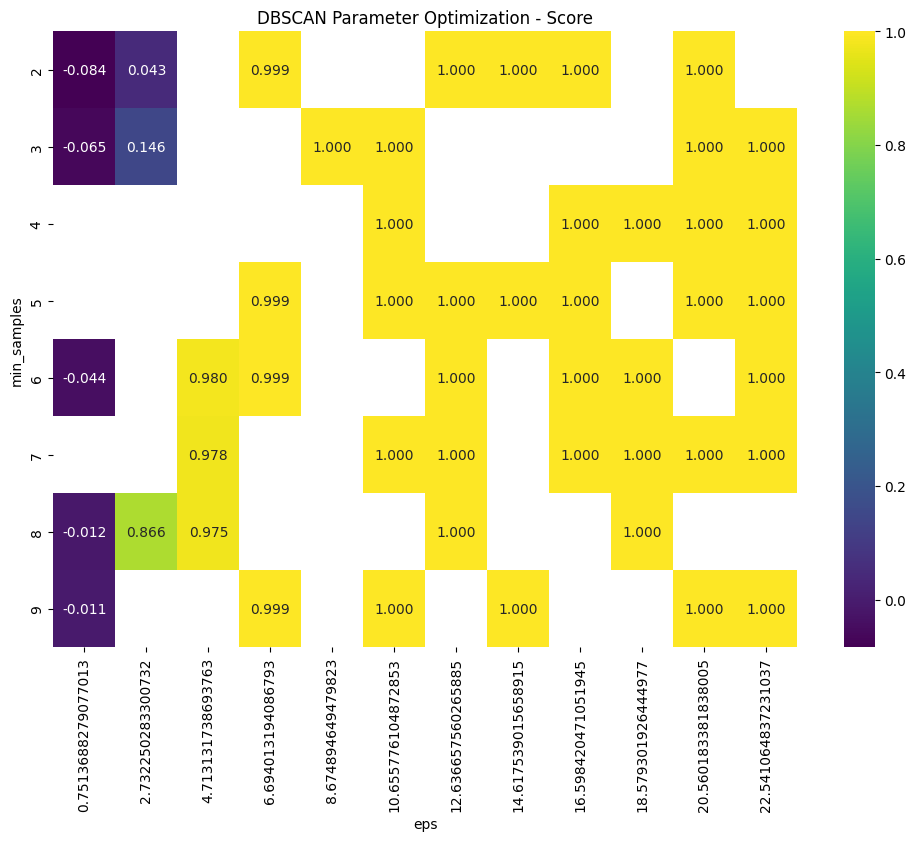


=== Running DBSCAN with eps=16.598, min_samples=4 ===
Estimated number of clusters: 1
Estimated number of noise points: 0
Noise ratio: 0.000
Cluster sizes: {np.int64(0): np.int64(880)}
PCA explained variance ratio: [0.30673986 0.11199218]


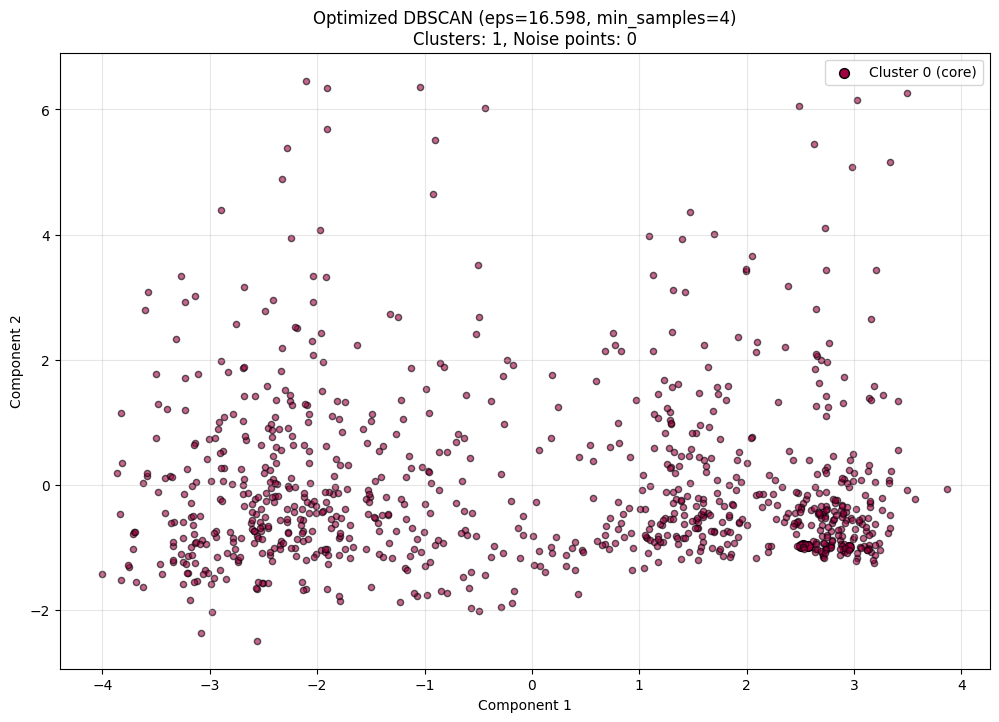

In [38]:
# First, diagnose your data
df, X = get_data()
suggestions = diagnose_dbscan_data(X)

# Then run the improved optimization
db, labels, params = dbscan_optimized(optimize_params=True)

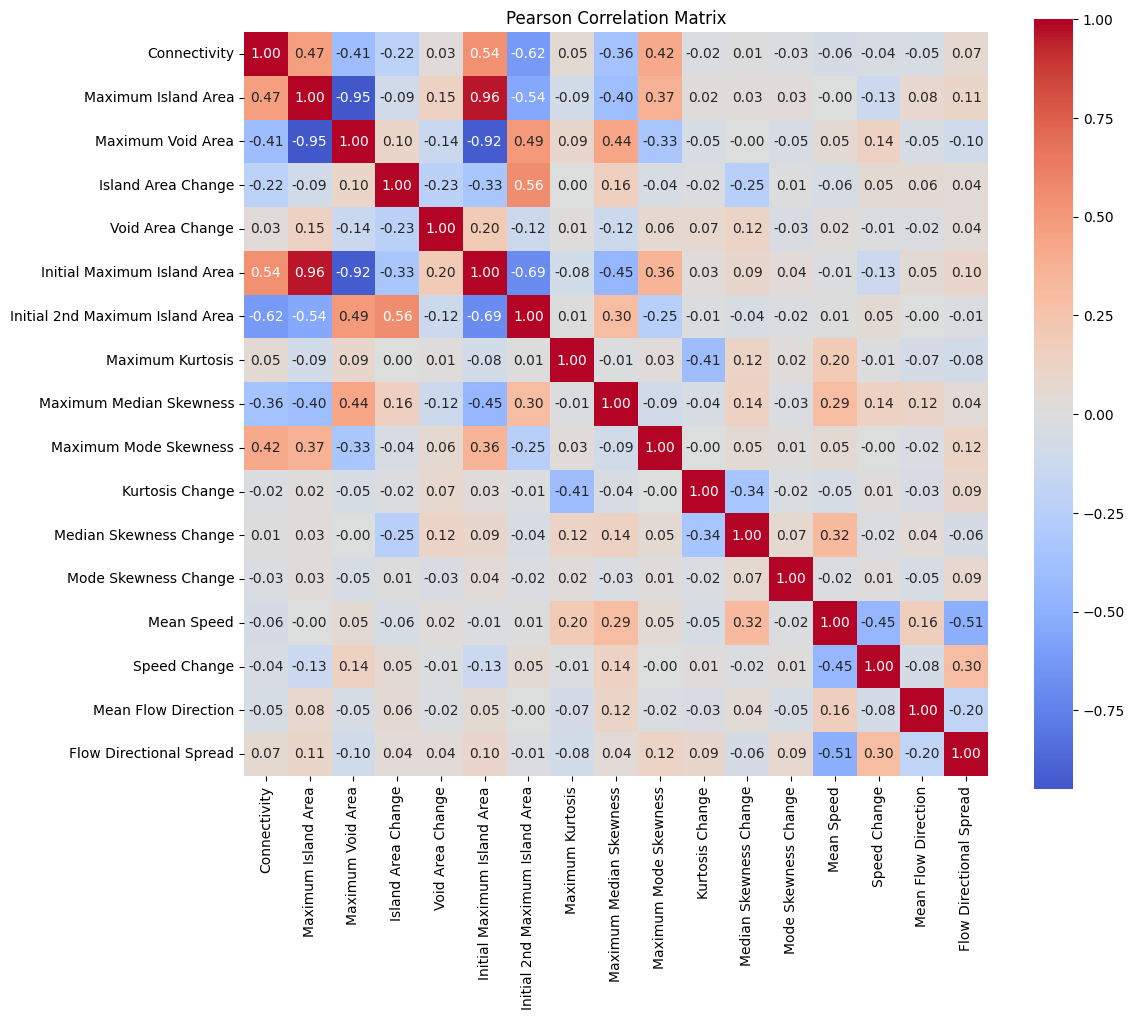

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
correlation_matrix = feature_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f"
)
plt.title("Pearson Correlation Matrix")
plt.show()

Original dimensions: (880, 17)
Explained variance ratio: [3.06739859e-01 1.11992179e-01 8.31729713e-02 7.02208004e-02
 6.46741927e-02 5.98747410e-02 5.39428461e-02 5.23806154e-02
 4.20824242e-02 4.13508203e-02 3.81551983e-02 2.65682043e-02
 2.18427634e-02 1.62264954e-02 9.23975895e-03 1.32225262e-03
 2.13877071e-04]
Cumulative explained variance: [0.30673986 0.41873204 0.50190501 0.57212581 0.6368     0.69667474
 0.75061759 0.80299821 0.84508063 0.88643145 0.92458665 0.95115485
 0.97299762 0.98922411 0.99846387 0.99978612 1.        ]


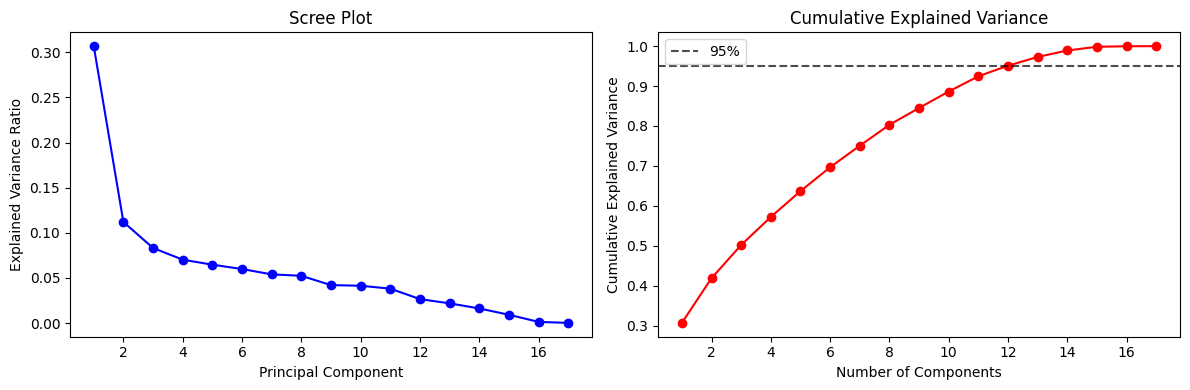

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Prepare the data
# Select numeric columns (exclude Filename, and possibly Channel/Flags if categorical)
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Or manually: numeric_cols = df.columns[3:]  # assuming first 3 are non-numeric

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

# 3. Fit PCA
pca = PCA()  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# 4. Analyze results
print(f"Original dimensions: {X_scaled.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Plot explained variance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    "bo-",
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")

plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    "ro-",
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.axhline(y=0.95, color="k", linestyle="--", alpha=0.7, label="95%")
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
from dataset_4 import get_c1_data, get_c2_data

get_c1_data()

TypeError: int() argument must be a string, a bytes-like object or a real number, not '_NoValueType'